In [25]:
import agine
import numpy as np
# import pandas as pd
from shapely.geometry import Polygon

In [10]:
agine.create_circle_polygon(72, 20).exterior.coords.xy

(array('d', [72.09639297983286, 72.09592676864162, 72.09454352220594, 72.0922567093458, 72.08908848897673, 72.08506949151577, 72.0802385193591, 72.07464216948743, 72.06833438197377, 72.06137591884406, 72.05383377837086, 72.04578055045924, 72.03729371930758, 72.02845491999116, 72.01934915602016, 72.0100639852646, 72.00068868191185, 71.99131338233086, 71.98202822285477, 71.972922477564, 71.96408370415135, 71.95559690588118, 71.94754371751647, 71.94000162287978, 71.93304321144024, 71.92673548097828, 71.92113919297609, 71.91630828691632, 71.9122893591482, 71.90912121140114, 71.90683447339646, 71.90545130333153, 71.90498516929247, 71.90544071389847, 71.90681370369694, 71.9090910640232, 71.91225099921624, 71.91626319725327, 71.92108911703656, 71.92668235574635, 71.93298909287137, 71.93994860675342, 71.94749385874194, 71.95555213935967, 71.96404577023657, 71.97289285498816, 71.98200807169923, 71.99130349923523, 72.00068946924486, 72.01007543544372, 72.01937085158465, 72.02848604942776, 72.037

In [6]:
x, y = agine.create_circle_polygon(72, 20).exterior.coords.xy
x, y = map(np.array, [x, y])

Object, given an *Azimuthal Angle* and *arc-spac* develop the sector-object for Shapely.

Let, Azimuthal Angle ($\alpha$) = 90 deg, and arc-span ($a_s$) = 120 deg. Then,
   * pos_point = $\alpha - \frac{a_s}{2}$ = 30
   * neg_point = $\alpha + \frac{a_s}{2}$ = 150

In [11]:
pos_point = agine.calculate_point_at_bearing(point = (72, 20), theta = 30, distance = 10, input_distance_unit = 'km')
neg_point = agine.calculate_point_at_bearing(point = (72, 20), theta = 150, distance = 10, input_distance_unit = 'km')

In [12]:
pos_point, neg_point

((72.04785193914667, 20.077877102316066),
 (72.04785193914667, 19.92211005328135))

In [16]:
lon_trim = [pos_point[0], neg_point[0]] # i.e. for filtering x-Values
lat_trim = [pos_point[1], neg_point[1]] # i.e. for filtering y-Values

In [24]:
x_trim = np.take(x, np.where(np.logical_and(x >= min(lon_trim), x >= max(lon_trim))))[0]
y_trim = np.take(y, np.where(np.logical_and(y >= min(lat_trim), y >= max(lat_trim))))[0]

In [27]:
p = Polygon(zip(x_trim, y_trim))

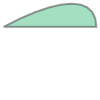

In [28]:
p

In [29]:
p.exterior.coords.xy

(array('d', [72.09639297983286, 72.09592676864162, 72.09454352220594, 72.0922567093458, 72.08908848897673, 72.08506949151577, 72.0802385193591, 72.07464216948743, 72.06833438197377, 72.06137591884406, 72.05383377837086, 72.09639297983286]),
 array('d', [20.079487405498032, 20.083262719880036, 20.086237515301228, 20.088383096605888, 20.08967876629727, 20.09011202519619, 20.089678693634504, 20.088382951984336, 20.086237300121876, 20.083262436227095, 20.07948705611841, 20.079487405498032]))